In [14]:
import pandas as pd
import Data_Cleaning as dc
import numpy as np
import sklearn
from sklearn import linear_model

import Data_Cleaning

In [ ]:
data = pd.read_csv('C:/Users/avich\DataspellProjects\My_Project\DataBase_noEncoding_var1.csv')
data.shape

In [ ]:
columns_to_drop = ['Company Name', 'Sector', 'Company Old', 'Revenue', 'Industry', 'Company Size', 'Salary Estimate', 'Founded']
data = data.drop(columns_to_drop, axis=1)
data.columns


# Starting the ML process

In [ ]:
# var1 = 'Experience'
# var2 = 'Scale_Company_Size'
# var3 = 'Work Life Balance'
# var4 = 'Rating'
#
# predict = 'Annual Salary'
# data_test = data[[predict, var1, var2, var3, var4]].copy()
#
# X = np.array(data_test.drop([predict], 1))
# y = np.array(data_test[predict])
#
# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [ ]:
predict = 'Work Life Balance'
X = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

# One Hot Encoding

In [ ]:

columns = ['Type of Ownership', 'Time Unit', 'Location']  # for one-hot encoding
data = dc.one_hot_encoding(data, columns)

In [ ]:
data.shape

# Training section

In [ ]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(f"acc = {acc}")
print(f"Coefficient: {linear.coef_}\n"
      f"Intercept: {linear.intercept_}")

# Using the model to predict data about new students

In [ ]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(f"Model prediction: {predictions[x]}      The input values: {x_test[x]}        The actual value: {y_test[x]}")
    # print(f"Score = {(predictions[x]/y_test[x])}")
    # print(f"Model prediction: {predictions[x]}           The actual value: {y_test[x]}")

# Saving the model
### In real-life, it takes a lot of time and resources to train a model. In that case, it is crustal to know how to save it for the next ues
### We will use 'pickle' for this job

In [ ]:
import pickle
with open('gameDevelopment.pickle', 'wb') as f:  # writing in binary mood
    pickle.dump(linear, f)

pickle_in = open('gameDevelopment.pickle', 'rb')
linear = pickle.load(pickle_in)

# Improving the model
We will keep one line of the initialization outside the for loop, because we will need them for other porpoises late.
The idea is to run in 'for' loop and keep the same logic, each iteration of the model will have different values **because they are split randomly.**
Each iteration of the model will update the file only if the acc score is better.


In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.1)
best = 0

for _ in range(700):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.1)


    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)

    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
        with open('best_model.pickle', 'wb') as f:
            pickle.dump(linear, f)
        print(f"The best so for! {best}")

print(f"The final ACC = {best}")



In [49]:
data = pd.read_csv('C:/Users/avich\DataspellProjects\My_Project\DataBase_noEncoding_var1.csv')

In [50]:
data = data[['Work Life Balance','Culture & Values', 'Senior Management', 'Career Opportunities', 'Comp & Benefits', 'Annual Salary', 'Experience', 'Education', 'Location', 'Type of Ownership']].copy()
data = dc.one_hot_encoding(data, ['Location', 'Type of Ownership'])
data.shape

(13796, 76)

In [52]:
predict = 'Work Life Balance'
X = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

acc = linear.score(x_test, y_test)
print(f"acc = {acc}")
print(f"Coefficient: {linear.coef_}\n"
      f"Intercept: {linear.intercept_}")

acc = 0.695196370704521
Coefficient: [ 5.34141129e-01  2.83885375e-01 -1.51104542e-01  1.10717209e-01
 -2.57656275e-09  3.76815067e-04 -8.68244005e-04  3.77048062e-01
  1.13693398e-01  2.37303700e-02  4.90150899e-02 -1.64861241e-02
  5.92500462e-02 -5.28581112e-03  7.47770376e-02 -5.24677910e-02
  3.63223987e-02 -4.53823562e-03  1.02838792e-01  4.95082364e-02
  4.94678509e-02  3.50694943e-02 -5.36595514e-02  5.49607323e-02
 -9.07954035e-02 -9.63831431e-03  3.01057843e-02  1.08981710e-01
  1.25640800e-01  4.67725894e-02  2.09868780e-02  6.12325119e-02
  1.61090547e-03  1.31356851e-01  3.13249857e-02  1.88481893e-01
  7.72620315e-02  1.16039843e-01  2.28960183e-02  7.38853703e-02
  2.94944653e-02  3.22682515e-02  2.80783687e-02  1.52645054e-02
 -3.77146779e-02  1.45333110e-03 -7.80366270e-02  6.23824018e-03
  7.34654655e-02 -4.13767575e-02  9.54405452e-04  2.13248292e-02
  1.11691593e-01  9.54353594e-02  2.62971082e-01  4.54315750e-02
 -2.65147422e-02 -1.52793323e-01  1.94469475e-02 -2.6

In [56]:
import pickle

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.1)
best = 0

for _ in range(700):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=.3)


    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)

    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
        with open('best_model.pickle', 'wb') as f:
            pickle.dump(linear, f)
        print(f"The best so for! {best}")

print(f"The final ACC = {best}")



0.6629695899909658
The best so for! 0.6629695899909658
0.6578490152687613
0.6694644605676574
The best so for! 0.6694644605676574
0.6958364373064154
The best so for! 0.6958364373064154
0.6578542817538622
0.6658617631280311
0.6756547757341899
0.6794027296915529
0.6821553819938104
0.6761078772925465
0.6746931397608276
0.6895163673177034
0.685125445562607
0.6624406249962908
0.6442312003977528
0.6600768049972064
0.6734852967027505
0.6448927024943621
0.6578449276424789
0.6583663833436333
0.6753999014315359
0.6752762293107997
0.6736440178682005
0.6553496132509545
0.6518770171589027
0.671074102644039
0.6571224296895999
0.6857794363944012
0.6871744706404193
0.6747710742459506
0.6535087032793947
0.674498834510479
0.6771974737923928
0.6735293968922935
0.6570907908162409
0.6954391219429865
0.6948104583974559
0.6455769851729367
0.6598315808514802
0.6710040924502705
0.6630558808279272
0.6481869745073633
0.6509207725075414
0.6724712276483281
0.6652201134758537
0.6677503957815906
0.6273355838431991
0.

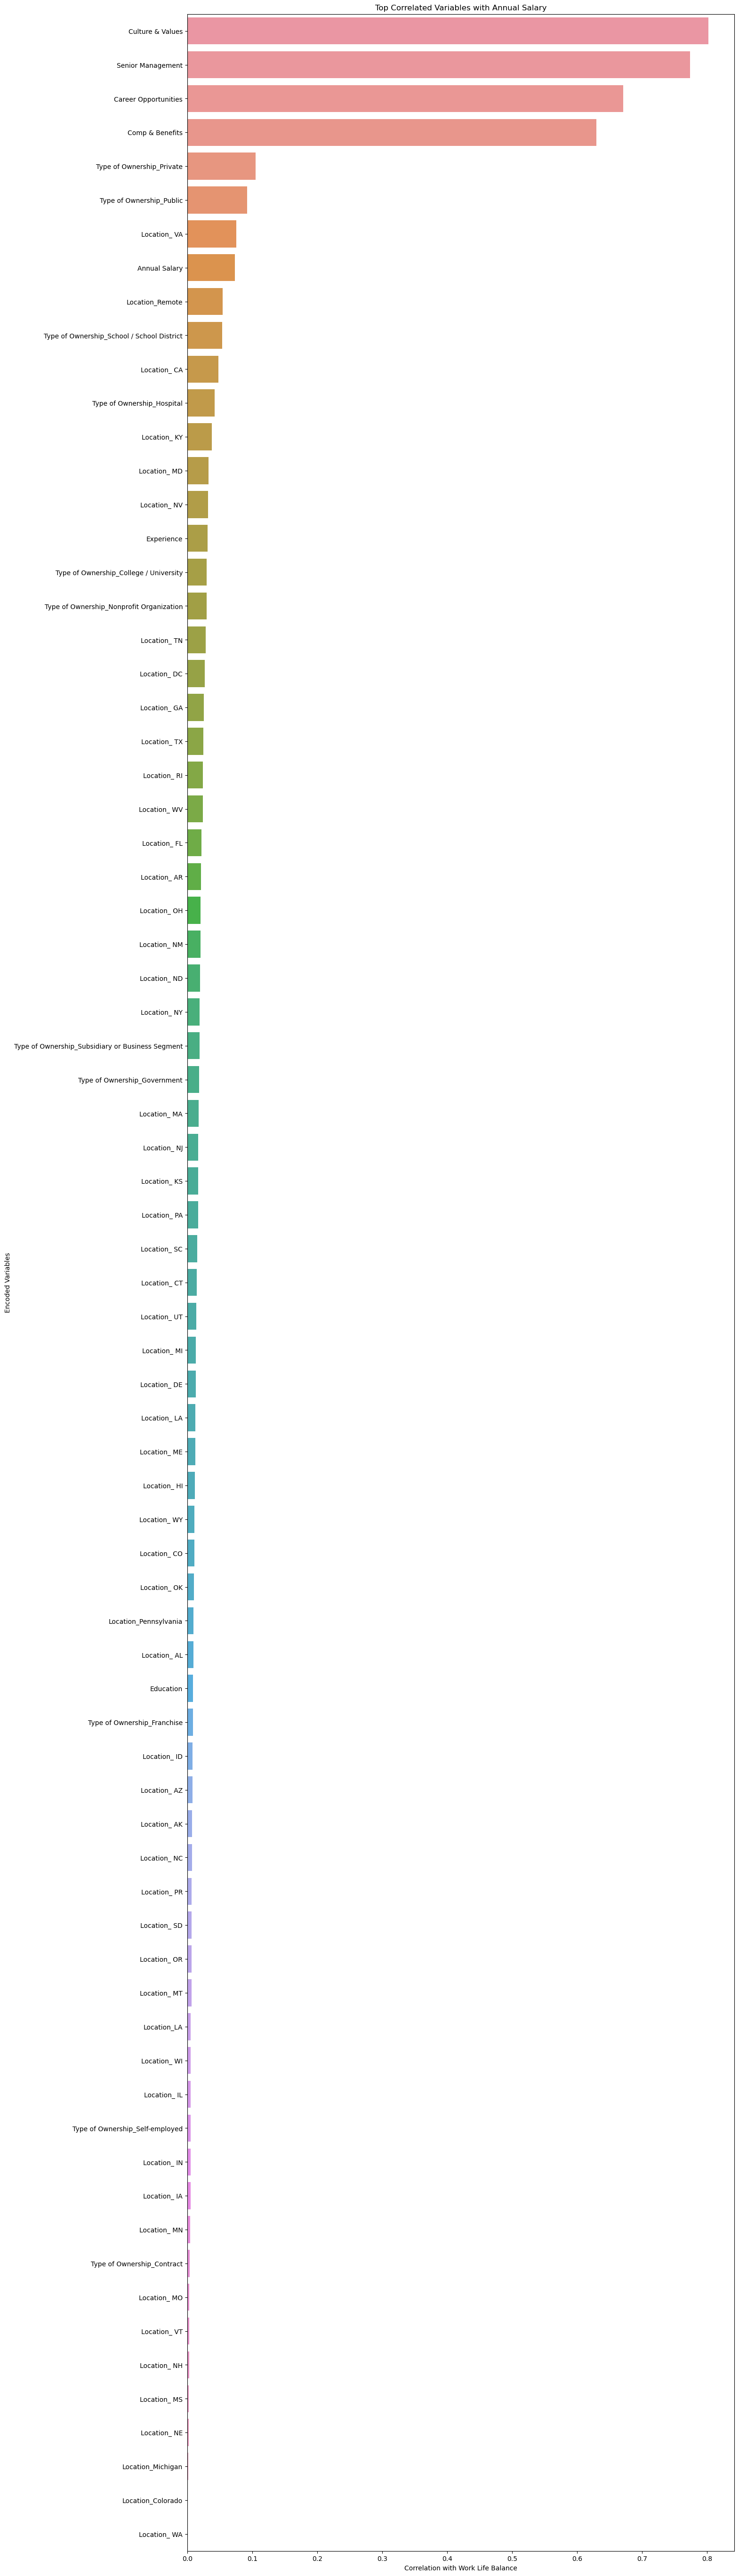

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

predict = 'Work Life Balance'

# Select the correlation of 'Annual Salary' with the encoded variables
salary_correlations = correlation_matrix[predict].drop(predict)

# Sort the correlations in descending order
sorted_correlations = salary_correlations.abs().sort_values(ascending=False)

# Visualize the top-correlated variables
plt.figure(figsize=(15, 70))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.xlabel(f"Correlation with {predict}")
plt.ylabel('Encoded Variables')
plt.title(f"Top Correlated Variables with {predict}")
plt.show()


Index(['Work Life Balance', 'Culture & Values', 'Senior Management',
       'Career Opportunities', 'Comp & Benefits', 'Annual Salary',
       'Experience', 'Education', 'Location_ AK', 'Location_ AL',
       'Location_ AR', 'Location_ AZ', 'Location_ CA', 'Location_ CO',
       'Location_ CT', 'Location_ DC', 'Location_ DE', 'Location_ FL',
       'Location_ GA', 'Location_ HI', 'Location_ IA', 'Location_ ID',
       'Location_ IL', 'Location_ IN', 'Location_ KS', 'Location_ KY',
       'Location_ LA', 'Location_ MA', 'Location_ MD', 'Location_ ME',
       'Location_ MI', 'Location_ MN', 'Location_ MO', 'Location_ MS',
       'Location_ MT', 'Location_ NC', 'Location_ ND', 'Location_ NE',
       'Location_ NH', 'Location_ NJ', 'Location_ NM', 'Location_ NV',
       'Location_ NY', 'Location_ OH', 'Location_ OK', 'Location_ OR',
       'Location_ PA', 'Location_ PR', 'Location_ RI', 'Location_ SC',
       'Location_ SD', 'Location_ TN', 'Location_ TX', 'Location_ UT',
       'Location_

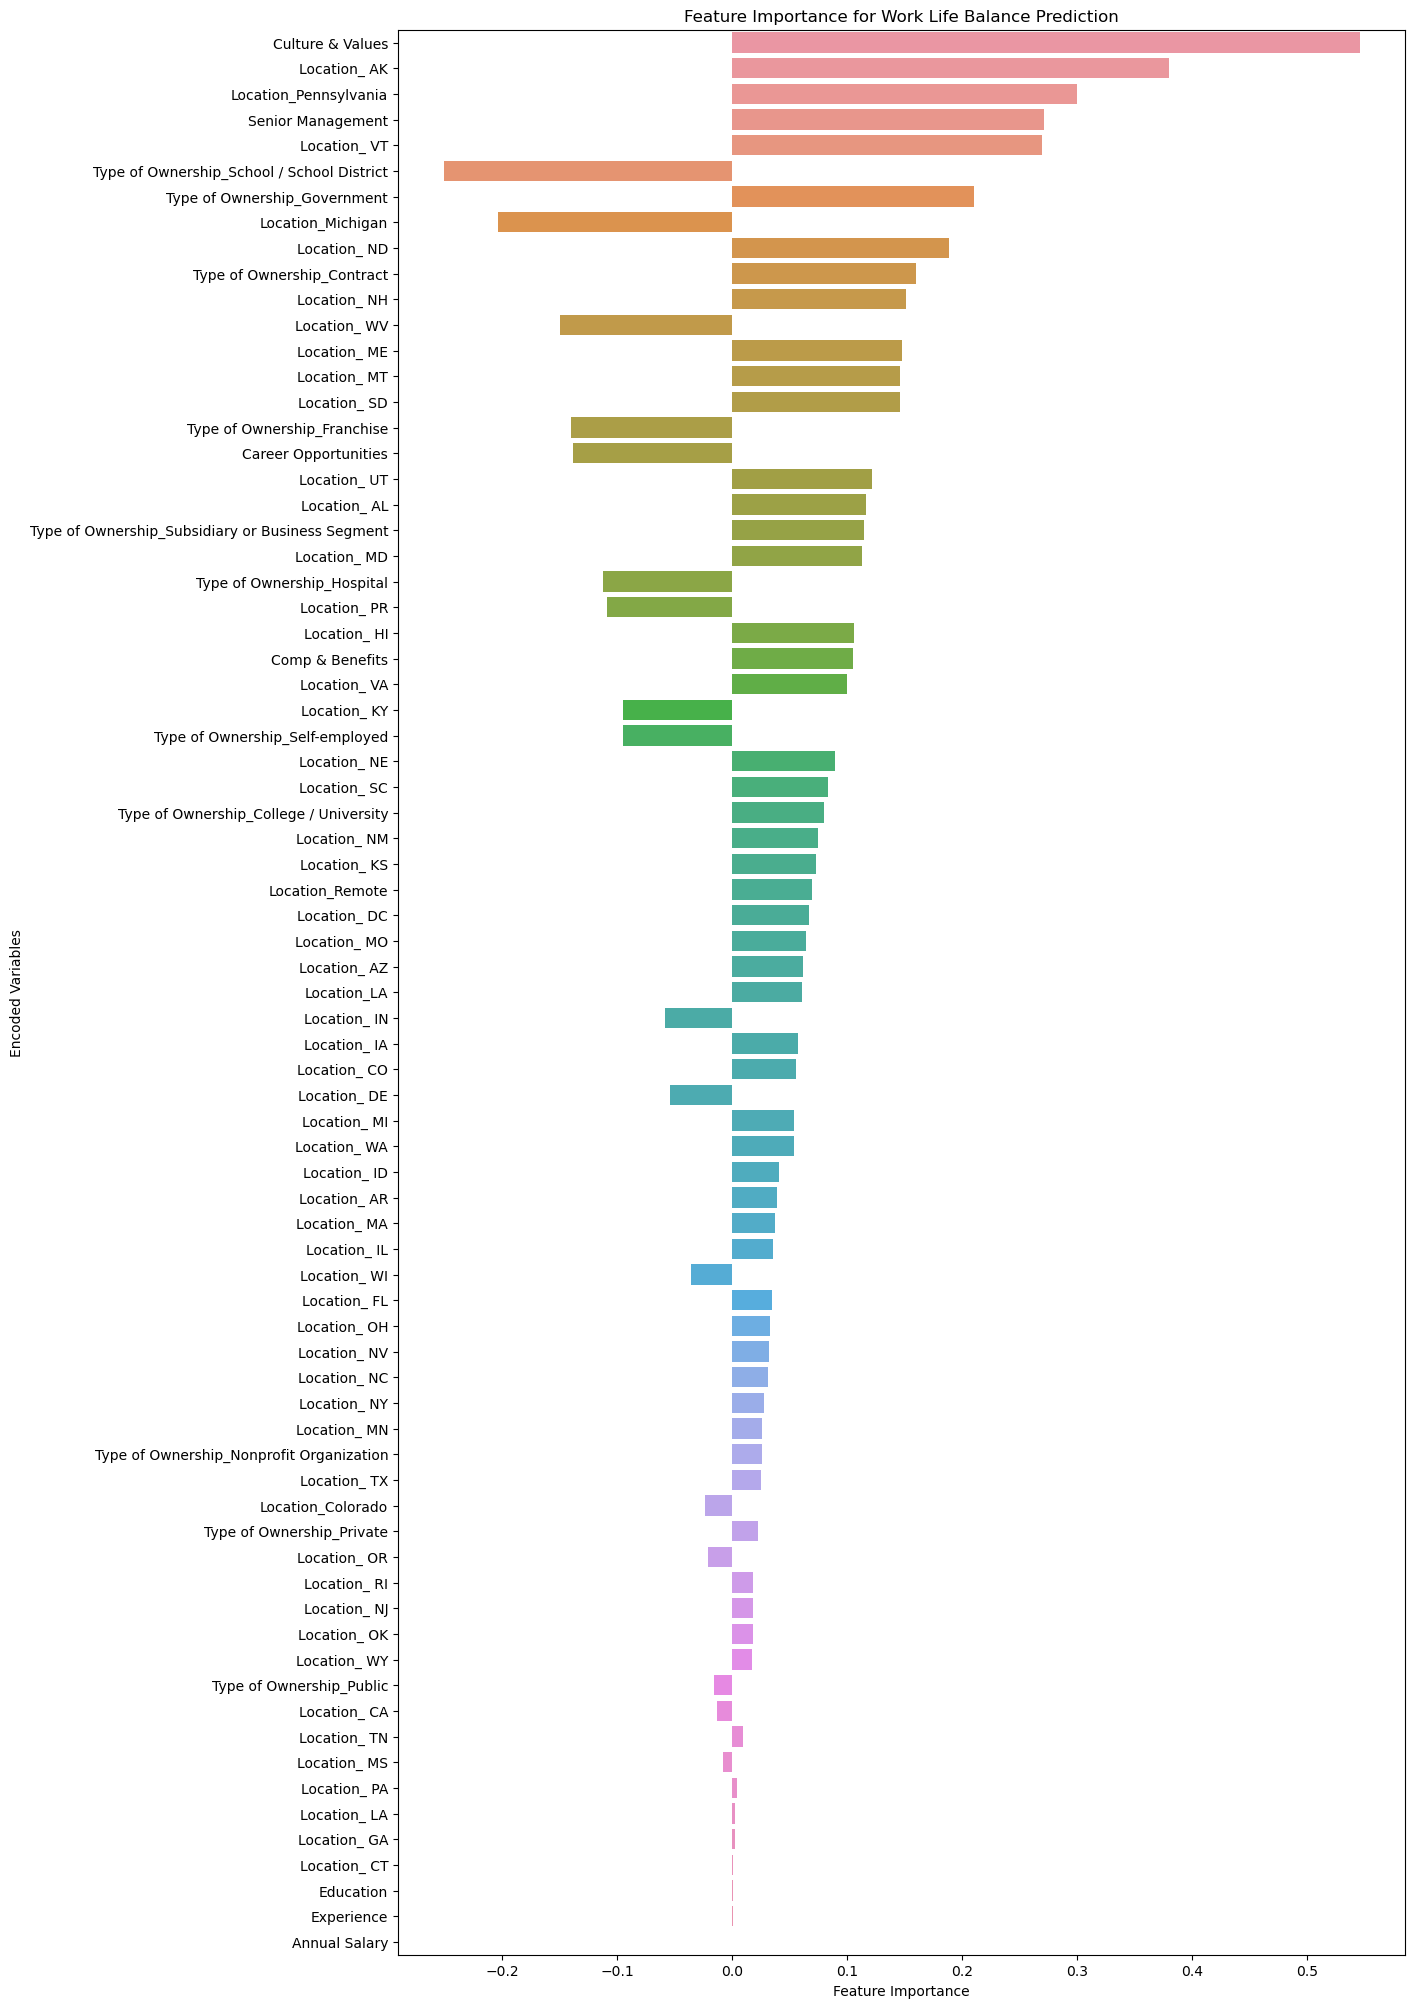

In [55]:
from sklearn.linear_model import LinearRegression
df = data.copy()

# Selecting only the numeric columns
df = df.select_dtypes(include=['number']).copy()
print(df.columns)


# Separate the features and target variable
X = df.drop(predict, axis=1)
y = df[predict]

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the feature importances
importances = model.coef_

# Sort the importances in descending order
sorted_importances = np.abs(importances).argsort()[::-1]


# Visualize the top feature importances
plt.figure(figsize=(13, 25))
sns.barplot(x=importances[sorted_importances], y=X.columns[sorted_importances])
plt.xlabel('Feature Importance')
plt.ylabel('Encoded Variables')
plt.title(f"Feature Importance for {predict} Prediction")
plt.show()
